# Exploratory data analysis on preprocesed SMILES dataset

Zuzanna Gorczyca, zgo@kth.se

Alga Nour Elimane, nealga@kth.se

Tse An Shih, tashih@kth.se

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
from Functions import *

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


### Load data

In [2]:
dir_path = os.getcwd()
train_path = os.path.join(dir_path, "datasets", "training_smiles_processed_without_fingerprints.csv")
train_path_fingerprints = "S:\\KTH\\Programing_for_data_science\\preprocessed_smiles_data1024.csv"
train_data = pd.read_csv(train_path_fingerprints)

## EDA

Find shape of data

In [3]:
train_data.shape

(202656, 1043)

In training data we have 202,895 samples with 3 features.
One is index, and one is label.

Columns names

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202656 entries, 0 to 202655
Columns: 1043 entries, ExactMolWt to ACTIVE
dtypes: float64(19), int64(1024)
memory usage: 1.6 GB


Non coulms with missing data or non-value colums.

Missing values

In [5]:
pd.DataFrame({'Null Values':train_data.isnull().sum()})


,Null Values
ExactMolWt,0
MolLogP,0
TPSA,0
NumRotBonds,0
NumHBD,0
...,...
Morgan_fp_1020,0
Morgan_fp_1021,0
Morgan_fp_1022,0
Morgan_fp_1023,0


Print firsts rows of dataset

In [6]:
train_data.head(5)

,ExactMolWt,MolLogP,TPSA,NumRotBonds,NumHBD,NumHBA,HeavyAtomCount,fr_Al_COO,MolWt,FractionCSP3,...,Morgan_fp_1015,Morgan_fp_1016,Morgan_fp_1017,Morgan_fp_1018,Morgan_fp_1019,Morgan_fp_1020,Morgan_fp_1021,Morgan_fp_1022,Morgan_fp_1023,ACTIVE
0,-0.156758,-0.586046,0.058894,-0.629533,-0.136775,0.540342,0.012432,-0.174975,-0.158371,0.441345,...,0,0,0,0,1,0,0,0,0,0.0
1,1.459772,0.024995,0.581255,0.986434,0.619974,0.057422,1.425810,-0.174975,1.462425,1.459279,...,0,0,0,0,1,0,0,0,0,0.0
2,-0.488987,0.693722,-0.497028,-0.306340,-0.136775,-0.425498,-0.694256,-0.174975,-0.485051,-0.503880,...,0,0,0,0,0,0,0,0,0,0.0
3,1.669653,1.256955,0.683473,0.986434,-0.136775,0.540342,1.567148,-0.174975,1.673042,-1.039288,...,0,0,0,0,0,0,0,0,0,0.0
4,0.856258,1.483860,0.154707,0.340047,0.619974,0.057422,0.719121,-0.174975,0.854682,-0.524232,...,0,0,0,0,0,0,0,0,0,0.0


In [35]:
train_data, normalisation_mask = create_normalization(train_data, "minmax")
display(train_data.head(5))

,NoAtoms,CalcExactMolWt,fr_Al_COO,HeavyAtomCount,NumHDonors,NumHAcceptors,MFp_0,MFp_1,MFp_2,MFp_3,...,MFp_115,MFp_116,MFp_117,MFp_118,MFp_119,MFp_120,MFp_121,MFp_122,MFp_123,ACTIVE
INDEX,,,,,,,,,,,,,,,,,,,,,
1,0.102719,0.098677,0.0,0.102719,0.027027,0.076923,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.057402,0.057045,0.0,0.057402,0.013514,0.061538,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.105740,0.103160,0.0,0.105740,0.013514,0.092308,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.087613,0.085784,0.0,0.087613,0.027027,0.076923,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.063444,0.055553,0.0,0.063444,0.027027,0.092308,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


BOXPLOTS

ValueError: Could not interpret value `NoAtoms` for `x`. An entry with this name does not appear in `data`.

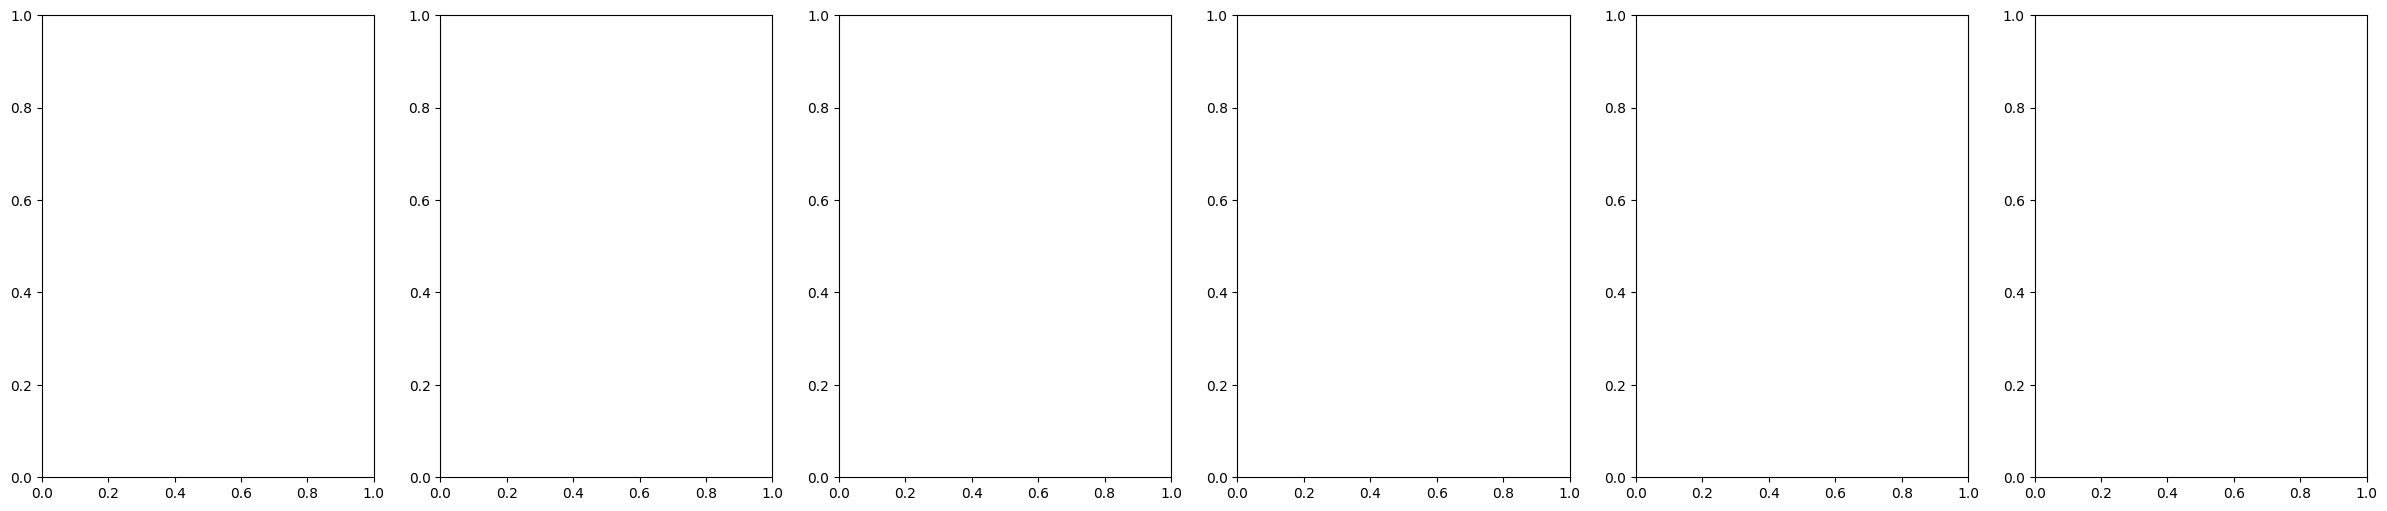

In [50]:
num_vars = ["NoAtoms", "CalcExactMolWt", "fr_Al_COO", "HeavyAtomCount", "NumHDonors", "NumHAcceptors"]

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(30, 6))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

plt.show()

HISTOGRAMS

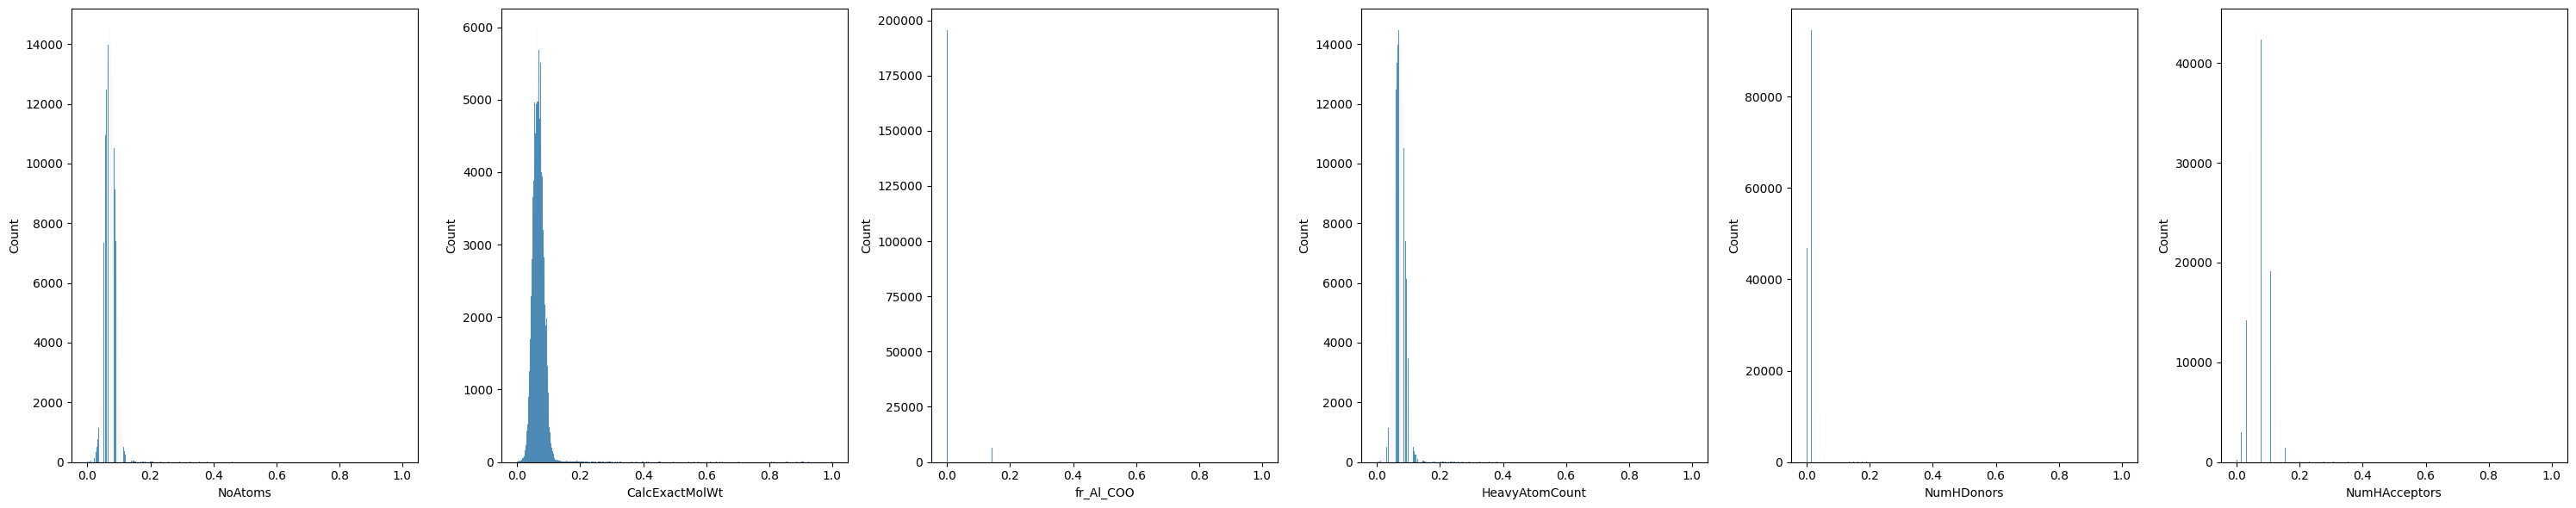

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(30, 6))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

plt.show()

In [52]:
# Select only numeric columns for correlation

plt.figure(figsize=(20, 16))
sns.heatmap(x_data[num_vars].corr(), fmt='.2g', annot=True)

KeyError: "['NoAtoms', 'CalcExactMolWt', 'NumHDonors', 'NumHAcceptors'] not in index"

<Figure size 2000x1600 with 0 Axes>

In [98]:
train_data.to_csv("./datasets/training_smiles_processed_norm_bins.csv")

In [39]:
train_data["ACTIVE"].describe()

count    202416.000000
mean          0.061714
std           0.240637
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ACTIVE, dtype: float64

In [7]:
y_data = train_data["ACTIVE"]
x_data = train_data.drop("ACTIVE", axis=1)

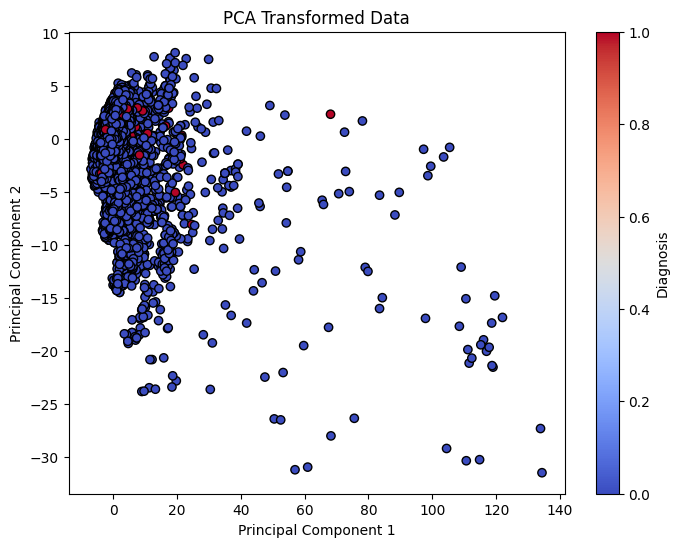

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_data)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_data, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()

### SMOTH - dealing with imbalance data

In [22]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_data, y_data)
print("Size of X_data resample:", len(X_train_smote))

Size of X_data resample: 379848


In [23]:
display(X_train_smote)

,NoAtoms,CalcExactMolWt,fr_Al_COO,HeavyAtomCount,NumHDonors,NumHAcceptors
0,0.102719,0.098677,0.0,0.102719,0.027027,0.076923
1,0.057402,0.057045,0.0,0.057402,0.013514,0.061538
2,0.105740,0.103160,0.0,0.105740,0.013514,0.092308
3,0.087613,0.085784,0.0,0.087613,0.027027,0.076923
4,0.063444,0.055553,0.0,0.063444,0.027027,0.092308
...,...,...,...,...,...,...
379843,0.084592,0.075728,0.0,0.084592,0.013514,0.076923
379844,0.066465,0.057230,0.0,0.066465,0.013514,0.030769
379845,0.063444,0.059990,0.0,0.063444,0.013514,0.030769
379846,0.060423,0.057160,0.0,0.060423,0.013514,0.061538


In [24]:
y_train_smote.describe()

count    379848.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: ACTIVE, dtype: float64

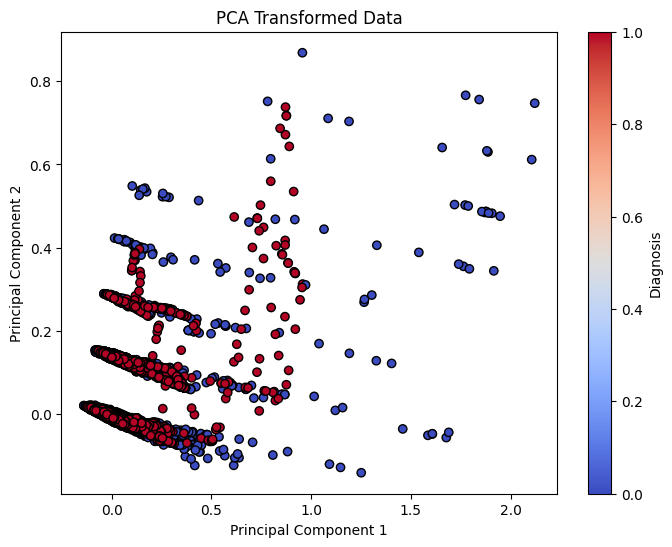

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_smote)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_smote, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()

In [18]:
X_train_smote.insert(0, "ACTIVE", y_train_smote)
display(X_train_smote)

,ACTIVE,NoAtoms,CalcExactMolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MFp_0,MFp_1,MFp_2,MFp_3,...,MFp_114,MFp_115,MFp_116,MFp_117,MFp_118,MFp_119,MFp_120,MFp_121,MFp_122,MFp_123
0,0.0,9,9,9,1,2,0.000000,1.0,0.000000,1.000000,...,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
1,0.0,1,2,1,0,1,1.000000,1.0,0.000000,1.000000,...,0.0,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0
2,0.0,9,9,9,0,3,0.000000,0.0,1.000000,1.000000,...,0.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0
3,0.0,8,8,8,1,2,0.000000,0.0,0.000000,1.000000,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
4,0.0,2,2,2,1,3,0.000000,0.0,0.000000,1.000000,...,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379843,1.0,7,7,7,0,2,0.409205,1.0,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.409205,0.590795,0.000000,1.000000,0.0
379844,1.0,3,2,3,0,0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.771211,1.000000,0.000000,0.000000,1.000000,0.0
379845,1.0,2,3,2,0,0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.330796,1.000000,0.0
379846,1.0,1,2,1,0,1,0.000000,0.0,0.510632,0.510632,...,0.0,1.0,0.489368,0.510632,0.000000,0.000000,0.000000,0.000000,1.000000,0.0


In [19]:
X_train_smote.to_csv("./datasets/training_smiles_processed_smoth.csv")

### ADYSYN - dealing with inbalance data

In [20]:
adasyn = ADASYN(random_state = 101)
X_tarin_adysyn, y_train_adysyn = adasyn.fit_resample(x_data, y_data)

In [21]:
y_train_adysyn.describe()

count    378228.000000
mean          0.497858
std           0.499996
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: ACTIVE, dtype: float64

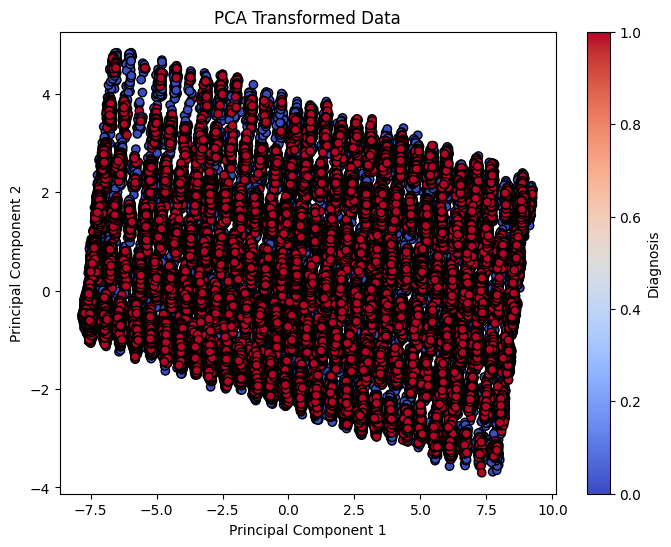

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tarin_adysyn)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_adysyn, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()

In [24]:
X_tarin_adysyn.insert(0, "ACTIVE", y_train_adysyn)
display(X_tarin_adysyn)

,ACTIVE,NoAtoms,CalcExactMolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MFp_0,MFp_1,MFp_2,MFp_3,...,MFp_114,MFp_115,MFp_116,MFp_117,MFp_118,MFp_119,MFp_120,MFp_121,MFp_122,MFp_123
0,0.0,9,9,9,1,2,0.0,1.0,0.000000,1.0,...,0.0,0.0,0.000000,1.0,0.000000,1.0,1.0,1.000000,1.0,0.000000
1,0.0,1,2,1,0,1,1.0,1.0,0.000000,1.0,...,0.0,1.0,0.000000,0.0,1.000000,1.0,0.0,1.000000,1.0,0.000000
2,0.0,9,9,9,0,3,0.0,0.0,1.000000,1.0,...,0.0,1.0,1.000000,1.0,0.000000,1.0,0.0,1.000000,1.0,0.000000
3,0.0,8,8,8,1,2,0.0,0.0,0.000000,1.0,...,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000
4,0.0,2,2,2,1,3,0.0,0.0,0.000000,1.0,...,0.0,1.0,0.000000,1.0,0.000000,0.0,1.0,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378223,1.0,2,3,2,0,2,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.500496,0.0,0.000000,0.0,0.0,0.500496,1.0,0.500496
378224,1.0,1,3,1,0,2,0.0,1.0,0.847445,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000
378225,1.0,1,3,1,0,2,0.0,1.0,0.183234,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000
378226,1.0,2,2,2,0,2,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.785533,0.0,0.0,0.000000,1.0,0.000000


In [25]:
X_tarin_adysyn.to_csv("./datasets/training_smiles_processed_adysyn.csv")